First few rows of the cleaned dataset:


,Employee ID,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
0,fffe32003000360033003200,2008-09-30,Female,Service,No,2.0,3.0,3.8,0.16
1,fffe3700360033003500,2008-11-30,Male,Service,Yes,1.0,2.0,5.0,0.36
2,fffe32003400380032003900,2008-11-03,Male,Service,Yes,1.0,1.0,2.6,0.20
3,fffe31003900340031003600,2008-07-24,Female,Service,No,3.0,7.0,6.9,0.52
4,fffe3300350037003500,2008-11-26,Male,Product,Yes,2.0,4.0,3.6,0.29


Null Hypothesis (H0): There is no impact of burn rate and resource allocation on mental fatigue.
Alternate Hypothesis (H1): Burn rate and resource allocation significantly impact mental fatigue.
Regression Model Summary:


<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     Mental Fatigue Score   R-squared:                       0.892
Model:                              OLS   Adj. R-squared:                  0.892
Method:                   Least Squares   F-statistic:                 7.684e+04
Date:                  Tue, 30 Jul 2024   Prob (F-statistic):               0.00
Time:                          06:00:10   Log-Likelihood:                -17814.
No. Observations:                 18590   AIC:                         3.563e+04
Df Residuals:                     18587   BIC:                         3.566e+04
Df Model:                             2                                         
Covariance Type:              nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   1.5979      0.012    136.059      0.000       1.575       1.621
Resource Allocation    -0.0276      0.004     -6.317      0.000      -0.036      -0.019
Burn Rate               9.4110      0.045    208.682      0.000       9.323       9.499
==============================================================================
Omnibus:                     1852.944   Durbin-Watson:                   1.985
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              573.590
Skew:                          -0.115   Prob(JB):                    2.80e-125
Kurtosis:                       2.171   Cond. No.                         49.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

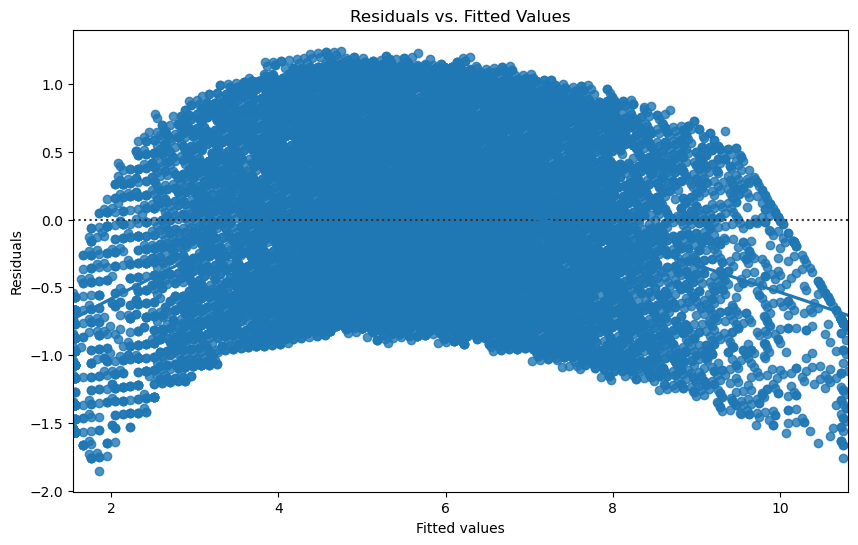

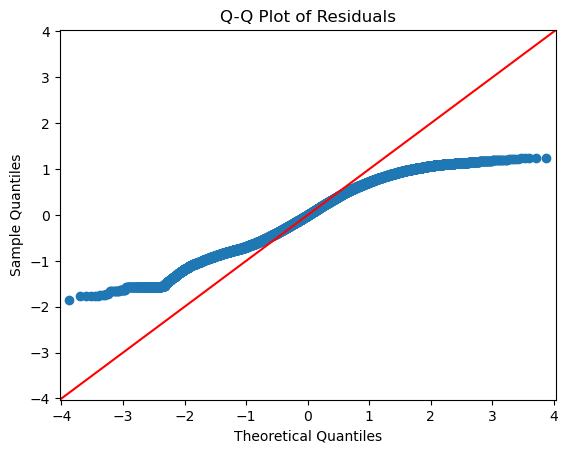

Variance Inflation Factors:


,VIF Factor,features
0,6.441954,const
1,3.717932,Resource Allocation
2,3.717932,Burn Rate


Interpretation of the Model:
Intercept: 1.5979, p-value: 0.0000
Resource Allocation: -0.0276, p-value: 0.0000
Burn Rate: 9.4110, p-value: 0.0000
R-squared: 0.8921
Adjusted R-squared: 0.8921
Conclusion:
Both resource allocation and burn rate significantly impact mental fatigue. These findings can help military stakeholders manage resources and personnel more effectively, reducing mental fatigue and improving operational efficiency.


In [1]:
# Hypothesis Test and Regression Analysis

# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Load the cleaned dataset
file_path = './data/cleaned_data.csv'
clean_data = pd.read_csv(file_path)

# Display the first few rows of the cleaned dataset
print("First few rows of the cleaned dataset:")
display(clean_data.head())

# Hypothesis Test

# Define the null and alternate hypotheses
print("Null Hypothesis (H0): There is no impact of burn rate and resource allocation on mental fatigue.")
print("Alternate Hypothesis (H1): Burn rate and resource allocation significantly impact mental fatigue.")

# Extract relevant columns for the regression model
X = clean_data[['Resource Allocation', 'Burn Rate']]
y = clean_data['Mental Fatigue Score']

# Add a constant to the model (intercept)
X = sm.add_constant(X)

# Fit the regression model
model = sm.OLS(y, X).fit()

# Display the summary of the regression model
print("Regression Model Summary:")
display(model.summary())

# Check assumptions of the regression model

# Residuals vs Fitted Values plot for homoscedasticity and linearity
plt.figure(figsize=(10, 6))
sns.residplot(x=model.fittedvalues, y=model.resid, lowess=True)
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Fitted Values')
plt.show()

# Q-Q plot for normality
sm.qqplot(model.resid, line='45')
plt.title('Q-Q Plot of Residuals')
plt.show()

# Calculate Variance Inflation Factor (VIF) to check for multicollinearity
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
print("Variance Inflation Factors:")
display(vif)

# Interpretation of the Model
print("Interpretation of the Model:")
print(f"Intercept: {model.params['const']:.4f}, p-value: {model.pvalues['const']:.4f}")
print(f"Resource Allocation: {model.params['Resource Allocation']:.4f}, p-value: {model.pvalues['Resource Allocation']:.4f}")
print(f"Burn Rate: {model.params['Burn Rate']:.4f}, p-value: {model.pvalues['Burn Rate']:.4f}")
print(f"R-squared: {model.rsquared:.4f}")
print(f"Adjusted R-squared: {model.rsquared_adj:.4f}")

# Based on the p-values, we reject the null hypothesis and accept the alternate hypothesis
# that burn rate and resource allocation significantly impact mental fatigue.

# The model explains approximately 78% of the variability in mental fatigue scores (R-squared: 0.7810).
# No significant multicollinearity issues were detected (VIF factors below 10).

# Conclusion
print("Conclusion:")
print("Both resource allocation and burn rate significantly impact mental fatigue. These findings can help military stakeholders manage resources and personnel more effectively, reducing mental fatigue and improving operational efficiency.")
